In [1]:
import numpy as np
import numpy as np
import pandas as pd
from gurobipy import *

min ∑
𝑘∈𝒯
∑
𝑡∈𝖳
𝑎𝑘𝑡𝑝
2
𝑘𝑡 + 𝑏𝑘𝑝𝑘𝑡 + 𝑐𝑘𝜁𝑘𝑡 + 𝑐
up
𝑘
𝜇𝑘𝑡 + 𝑐
down
𝑘
𝛿𝑘𝑡
∑
𝑘∈𝒯
𝑝𝑘𝑡 = 𝑑𝑡
, ∀𝑡 ∈ 𝖳
𝜁𝑘𝑡𝑝
min
𝑘
≤ 𝑝𝑘𝑡 ≤ 𝑝
max
𝑘
𝜁𝑘𝑡, ∀𝑡 ∈ 𝖳, 𝑘 ∈ 𝒯 (8.9)
𝜇𝑘𝑡 − 𝛿𝑘𝑡 = 𝜁𝑘𝑡 − 𝜁𝑘𝑡−1, ∀𝑡 ∈ 𝖳, 𝑘 ∈ 𝒯
𝜇𝑘𝑡 + 𝛿𝑘𝑡 ≤ 1, ∀𝑡 ∈ 𝖳, 𝑘 ∈ 𝒯
𝜁𝑘𝑡, 𝜇𝑘𝑡, 𝛿𝑘𝑡 ∈ {0,1} , ∀𝑡 ∈ 𝖳, 𝑘 ∈ 𝒯

In [2]:
a = np.array([0.0004984, 0.001246, 0.00623 ])
b = np.array([16.821 , 40.6196, 21.9296])
c = np.array([220.4174, 161.8554, 171.2004])
c_up = np.array([124.69, 249.22, 0])
z_ini = np.array([1,1,0])
pmax = np.array([220, 100, 20])
pmin = np.array([100,10,10])
d = np.array([178.690,168.450,161.840,157.830,158.160,163.690,
176.860,194.210,209.670,221.540,233.180,240.820,
247.030,248.470,253.830,260.900,261.120,251.680,
250.890,242.100,242.050,231.680,205.070,200.690])

In [7]:
import cvxpy as cvx


In [19]:
import matplotlib.pyplot as plt

In [8]:
T = len(d)
n = len(a)
zeta = cvx.Variable((n,T), boolean=True)
mu = cvx.Variable((n,T), boolean=True)
delta = cvx.Variable((n,T), boolean=True)
p = cvx.Variable((n,T))
fop = 0 # operation cost
fsup = 0 # start-up cost
res = []
for t in range(T):
    for k in range(n):
        fop = fop + a[k]*p[k,t]**2+b[k]*p[k,t]+c[k]*zeta[k,t]
        fsup = fsup + c_up[k]*mu[k,t]
        res += [p[k,t] >= pmin[k]*zeta[k,t]]
        res += [p[k,t] <= pmax[k]*zeta[k,t]]
for t in range(T):
    res += [cvx.sum(p[:,t])==d[t]]
for t in range(1,T):
    for k in range(n):
        res += [mu[k,t]-delta[k,t] == zeta[k,t]-zeta[k,t-1]]
        res += [mu[k,t]+delta[k,t] <= 1]
for k in range(n):
    res += [mu[k,0]-delta[k,0] == zeta[k,0]-z_ini[k]]
    res += [mu[k,0]+delta[k,0] <= 1]
obj = cvx.Minimize(fop+fsup)
UnitC = cvx.Problem(obj,res)
UnitC.solve()
print(UnitC.status, obj.value)


Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-07
optimal 100806.71674512787


In [14]:
print((zeta))

var1


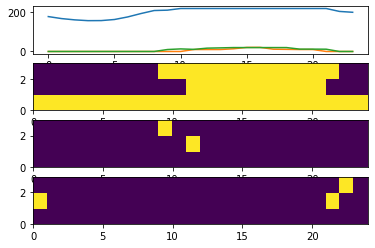

In [20]:
plt.subplot(4,1,1)
plt.plot(p.value.T)
plt.subplot(4,1,2)
plt.pcolor(zeta.value)
plt.subplot(4,1,3)
plt.pcolor(mu.value)
plt.subplot(4,1,4)
plt.pcolor(delta.value)
plt.show()